<a href="https://colab.research.google.com/github/Moukthika1253/Facial_Expression_ImageClassifier/blob/main/facial_expression_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf

<Axes: >

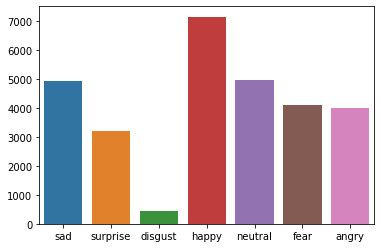

In [3]:
train_data="/content/images/train"
test_data="/content/images/validation"
train_count=[]
exp_list=[]
for emotion in os.listdir(train_data):
  exp_list.append(emotion)
  train_count.append(len(os.listdir(train_data+"/"+emotion)))
sns.barplot(x=exp_list,y=train_count)


<Axes: >

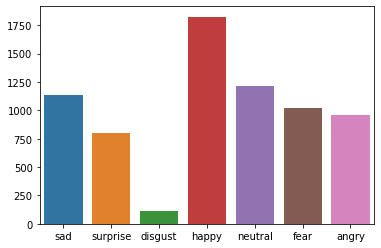

In [4]:
test_count=[]
for emotion in os.listdir(test_data):
  test_count.append(len(os.listdir(test_data+"/"+emotion)))
sns.barplot(x=exp_list,y=test_count)

**Face Expression images**

     sad            surprise            disgust            happy            neutral            fear            angry       

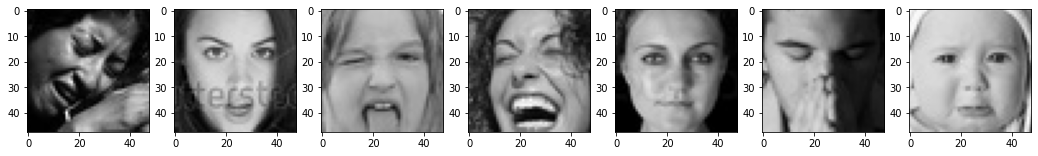

In [5]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
i=0
_, axes = plt.subplots(1, 7, figsize=(18, 16))
axes = axes.flatten()
for emotion,a in zip(os.listdir(train_data),axes):
   images=image.load_img(train_data+"/"+emotion+"/"+os.listdir(train_data+"/"+emotion)[0])
   print("     "+exp_list[i],end="       ")
   a.imshow(images,cmap="gray")
   i=i+1
plt.show()



# **Image Generator**

In [6]:
from keras.preprocessing.image import ImageDataGenerator
data_train = ImageDataGenerator()
data_validation=ImageDataGenerator()
train_gen=data_train.flow_from_directory(train_data,target_size=(48,48),
                                                    color_mode="grayscale",
                                                    class_mode='categorical',
                                                    shuffle=True,seed=42)
validation_gen=data_validation.flow_from_directory(test_data,target_size=(48,48),
                                                    color_mode="grayscale",
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# **Building Convolutional Neural Networks (CNN)**

**Importing libraries to build CNN**

In [23]:
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D,Conv3D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import SGD,Adagrad,Adadelta,Adam,RMSprop
from keras.regularizers import l1,l2


**Model with 2 convolution layers and 2 fully connected layers optimizer=SGD activation = sigmoid**

In [13]:
model=Sequential()
#first convolution layer
model.add(Conv2D(64,(3,3),strides=(1,1),padding="same",input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(MaxPooling2D(pool_size=(2, 2)))


#second convolution layer
model.add(Conv2D(128,(3,3),strides=(2,2),padding="same"))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

#1st fully connected layer
model.add(Dense(512,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.30))

#2nd fully connected layer
model.add(Dense(256,kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.30))

#last layer
model.add(Dense(7))
model.add(Activation('softmax'))

#compiling model
opti=SGD(learning_rate=0.001)
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 batch_normalization_12 (Bat  (None, 12, 12, 128)     

**Training the model**

In [15]:
%%time
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

batch_size=128
history = model.fit(train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=50,
                                validation_data = validation_gen,
                                validation_steps = validation_gen.n//validation_gen.batch_size,
                                callbacks=callbacks_list)



Epoch 1/50
899/900 [============================>.] - ETA: 0s - loss: 2.0397 - accuracy: 0.2084

900/900 [==============================] - 31s 21ms/step - loss: 2.0398 - accuracy: 0.2085 - val_loss: 1.8577 - val_accuracy: 0.2947
Epoch 2/50
900/900 [==============================] - ETA: 0s - loss: 1.9653 - accuracy: 0.2454

900/900 [==============================] - 22s 24ms/step - loss: 1.9653 - accuracy: 0.2454 - val_loss: 1.8232 - val_accuracy: 0.3278
Epoch 3/50
900/900 [==============================] - ETA: 0s - loss: 1.9355 - accuracy: 0.2606

900/900 [==============================] - 19s 21ms/step - loss: 1.9355 - accuracy: 0.2606 - val_loss: 1.7954 - val_accuracy: 0.3430
Epoch 4/50
899/900 [============================>.] - ETA: 0s - loss: 1.9125 - accuracy: 0.2758

900/900 [==============================] - 18s 20ms/step - loss: 1.9126 - accuracy: 0.2758 - val_loss: 1.7723 - val_accuracy: 0.3609
Epoch 5/50
898/900 [============================>.] - ETA: 0s - loss: 1.8872 - accuracy: 0.2913

900/900 [==============================] - 16s 18ms/step - loss: 1.8872 - accuracy: 0.2915 - val_loss: 1.7535 - val_accuracy: 0.3767
Epoch 6/50
897/900 [============================>.] - ETA: 0s - loss: 1.8650 - accuracy: 0.3056

900/900 [==============================] - 16s 17ms/step - loss: 1.8649 - accuracy: 0.3056 - val_loss: 1.7354 - val_accuracy: 0.3891
Epoch 7/50
899/900 [============================>.] - ETA: 0s - loss: 1.8471 - accuracy: 0.3135

900/900 [==============================] - 19s 21ms/step - loss: 1.8470 - accuracy: 0.3136 - val_loss: 1.7212 - val_accuracy: 0.3923
Epoch 8/50
898/900 [============================>.] - ETA: 0s - loss: 1.8335 - accuracy: 0.3270

900/900 [==============================] - 16s 17ms/step - loss: 1.8332 - accuracy: 0.3270 - val_loss: 1.7129 - val_accuracy: 0.3962
Epoch 9/50
899/900 [============================>.] - ETA: 0s - loss: 1.8128 - accuracy: 0.3383

900/900 [==============================] - 16s 17ms/step - loss: 1.8129 - accuracy: 0.3382 - val_loss: 1.6980 - val_accuracy: 0.4017
Epoch 10/50
899/900 [============================>.] - ETA: 0s - loss: 1.8026 - accuracy: 0.3456

900/900 [==============================] - 17s 19ms/step - loss: 1.8025 - accuracy: 0.3457 - val_loss: 1.6856 - val_accuracy: 0.4048
Epoch 11/50
899/900 [============================>.] - ETA: 0s - loss: 1.7924 - accuracy: 0.3469

900/900 [==============================] - 19s 21ms/step - loss: 1.7926 - accuracy: 0.3467 - val_loss: 1.6827 - val_accuracy: 0.4135
Epoch 12/50
900/900 [==============================] - ETA: 0s - loss: 1.7733 - accuracy: 0.3549

900/900 [==============================] - 16s 18ms/step - loss: 1.7733 - accuracy: 0.3549 - val_loss: 1.6733 - val_accuracy: 0.4122
Epoch 13/50
898/900 [============================>.] - ETA: 0s - loss: 1.7639 - accuracy: 0.3566

900/900 [==============================] - 16s 18ms/step - loss: 1.7640 - accuracy: 0.3566 - val_loss: 1.6638 - val_accuracy: 0.4081
Epoch 14/50
899/900 [============================>.] - ETA: 0s - loss: 1.7581 - accuracy: 0.3613

900/900 [==============================] - 17s 19ms/step - loss: 1.7582 - accuracy: 0.3615 - val_loss: 1.6561 - val_accuracy: 0.4176
Epoch 15/50
897/900 [============================>.] - ETA: 0s - loss: 1.7463 - accuracy: 0.3696

900/900 [==============================] - 16s 17ms/step - loss: 1.7460 - accuracy: 0.3698 - val_loss: 1.6457 - val_accuracy: 0.4286
Epoch 16/50
898/900 [============================>.] - ETA: 0s - loss: 1.7351 - accuracy: 0.3767

900/900 [==============================] - 16s 18ms/step - loss: 1.7349 - accuracy: 0.3767 - val_loss: 1.6377 - val_accuracy: 0.4297
Epoch 17/50
897/900 [============================>.] - ETA: 0s - loss: 1.7263 - accuracy: 0.3761

900/900 [==============================] - 19s 21ms/step - loss: 1.7262 - accuracy: 0.3761 - val_loss: 1.6396 - val_accuracy: 0.4278
Epoch 18/50
900/900 [==============================] - ETA: 0s - loss: 1.7169 - accuracy: 0.3833

900/900 [==============================] - 16s 17ms/step - loss: 1.7169 - accuracy: 0.3833 - val_loss: 1.6312 - val_accuracy: 0.4199
Epoch 19/50
899/900 [============================>.] - ETA: 0s - loss: 1.7116 - accuracy: 0.3832

900/900 [==============================] - 16s 18ms/step - loss: 1.7116 - accuracy: 0.3832 - val_loss: 1.6465 - val_accuracy: 0.4163
Epoch 20/50
898/900 [============================>.] - ETA: 0s - loss: 1.7058 - accuracy: 0.3855

900/900 [==============================] - 16s 17ms/step - loss: 1.7060 - accuracy: 0.3856 - val_loss: 1.6147 - val_accuracy: 0.4374
Epoch 21/50
899/900 [============================>.] - ETA: 0s - loss: 1.6937 - accuracy: 0.3926

900/900 [==============================] - 16s 17ms/step - loss: 1.6937 - accuracy: 0.3926 - val_loss: 1.6081 - val_accuracy: 0.4395
Epoch 22/50
899/900 [============================>.] - ETA: 0s - loss: 1.6901 - accuracy: 0.3908

900/900 [==============================] - 19s 21ms/step - loss: 1.6905 - accuracy: 0.3906 - val_loss: 1.6040 - val_accuracy: 0.4396
Epoch 23/50
898/900 [============================>.] - ETA: 0s - loss: 1.6764 - accuracy: 0.3979

900/900 [==============================] - 16s 17ms/step - loss: 1.6767 - accuracy: 0.3976 - val_loss: 1.6201 - val_accuracy: 0.4270
Epoch 24/50
897/900 [============================>.] - ETA: 0s - loss: 1.6728 - accuracy: 0.4013

900/900 [==============================] - 16s 18ms/step - loss: 1.6733 - accuracy: 0.4013 - val_loss: 1.5933 - val_accuracy: 0.4455
Epoch 25/50
900/900 [==============================] - ETA: 0s - loss: 1.6670 - accuracy: 0.4072

900/900 [==============================] - 19s 21ms/step - loss: 1.6670 - accuracy: 0.4072 - val_loss: 1.6018 - val_accuracy: 0.4384
Epoch 26/50
900/900 [==============================] - ETA: 0s - loss: 1.6597 - accuracy: 0.4059

900/900 [==============================] - 18s 20ms/step - loss: 1.6597 - accuracy: 0.4059 - val_loss: 1.5917 - val_accuracy: 0.4423
Epoch 27/50
898/900 [============================>.] - ETA: 0s - loss: 1.6580 - accuracy: 0.4097

900/900 [==============================] - 27s 29ms/step - loss: 1.6575 - accuracy: 0.4101 - val_loss: 1.5921 - val_accuracy: 0.4388
Epoch 28/50
899/900 [============================>.] - ETA: 0s - loss: 1.6440 - accuracy: 0.4152

900/900 [==============================] - 22s 24ms/step - loss: 1.6441 - accuracy: 0.4151 - val_loss: 1.7611 - val_accuracy: 0.3717
Epoch 29/50
900/900 [==============================] - ETA: 0s - loss: 1.6422 - accuracy: 0.4170

900/900 [==============================] - 22s 24ms/step - loss: 1.6422 - accuracy: 0.4170 - val_loss: 1.5919 - val_accuracy: 0.4540
Epoch 30/50
900/900 [==============================] - ETA: 0s - loss: 1.6364 - accuracy: 0.4141

900/900 [==============================] - 16s 18ms/step - loss: 1.6364 - accuracy: 0.4141 - val_loss: 1.5885 - val_accuracy: 0.4460
Epoch 31/50
898/900 [============================>.] - ETA: 0s - loss: 1.6331 - accuracy: 0.4157

900/900 [==============================] - 16s 17ms/step - loss: 1.6330 - accuracy: 0.4156 - val_loss: 1.5824 - val_accuracy: 0.4459
Epoch 32/50
900/900 [==============================] - ETA: 0s - loss: 1.6250 - accuracy: 0.4227

900/900 [==============================] - 16s 18ms/step - loss: 1.6250 - accuracy: 0.4227 - val_loss: 1.5538 - val_accuracy: 0.4609
Epoch 33/50
899/900 [============================>.] - ETA: 0s - loss: 1.6182 - accuracy: 0.4270

900/900 [==============================] - 18s 20ms/step - loss: 1.6187 - accuracy: 0.4266 - val_loss: 1.5633 - val_accuracy: 0.4543
Epoch 34/50
900/900 [==============================] - ETA: 0s - loss: 1.6147 - accuracy: 0.4275

900/900 [==============================] - 17s 19ms/step - loss: 1.6147 - accuracy: 0.4275 - val_loss: 1.5474 - val_accuracy: 0.4602
Epoch 35/50
899/900 [============================>.] - ETA: 0s - loss: 1.6086 - accuracy: 0.4262

900/900 [==============================] - 16s 18ms/step - loss: 1.6084 - accuracy: 0.4264 - val_loss: 1.5505 - val_accuracy: 0.4555
Epoch 36/50
900/900 [==============================] - ETA: 0s - loss: 1.6098 - accuracy: 0.4280

900/900 [==============================] - 16s 18ms/step - loss: 1.6098 - accuracy: 0.4280 - val_loss: 1.5402 - val_accuracy: 0.4595
Epoch 37/50
897/900 [============================>.] - ETA: 0s - loss: 1.6005 - accuracy: 0.4328

900/900 [==============================] - 16s 17ms/step - loss: 1.6001 - accuracy: 0.4332 - val_loss: 1.5427 - val_accuracy: 0.4591
Epoch 38/50
898/900 [============================>.] - ETA: 0s - loss: 1.5971 - accuracy: 0.4334

900/900 [==============================] - 18s 20ms/step - loss: 1.5970 - accuracy: 0.4335 - val_loss: 1.5360 - val_accuracy: 0.4614
Epoch 39/50
899/900 [============================>.] - ETA: 0s - loss: 1.5952 - accuracy: 0.4321

900/900 [==============================] - 18s 20ms/step - loss: 1.5950 - accuracy: 0.4322 - val_loss: 1.5313 - val_accuracy: 0.4655
Epoch 40/50
897/900 [============================>.] - ETA: 0s - loss: 1.5878 - accuracy: 0.4376

900/900 [==============================] - 26s 29ms/step - loss: 1.5878 - accuracy: 0.4376 - val_loss: 1.5355 - val_accuracy: 0.4575
Epoch 41/50
900/900 [==============================] - ETA: 0s - loss: 1.5811 - accuracy: 0.4407

900/900 [==============================] - 16s 18ms/step - loss: 1.5811 - accuracy: 0.4407 - val_loss: 1.5319 - val_accuracy: 0.4649
Epoch 42/50
897/900 [============================>.] - ETA: 0s - loss: 1.5814 - accuracy: 0.4404

900/900 [==============================] - 16s 18ms/step - loss: 1.5820 - accuracy: 0.4404 - val_loss: 1.6160 - val_accuracy: 0.4393
Epoch 43/50
896/900 [============================>.] - ETA: 0s - loss: 1.5822 - accuracy: 0.4392

900/900 [==============================] - 19s 21ms/step - loss: 1.5827 - accuracy: 0.4391 - val_loss: 1.5348 - val_accuracy: 0.4643
Epoch 44/50
898/900 [============================>.] - ETA: 0s - loss: 1.5769 - accuracy: 0.4395

900/900 [==============================] - 16s 18ms/step - loss: 1.5770 - accuracy: 0.4395 - val_loss: 1.5388 - val_accuracy: 0.4658
Epoch 45/50
898/900 [============================>.] - ETA: 0s - loss: 1.5693 - accuracy: 0.4466

900/900 [==============================] - 18s 19ms/step - loss: 1.5695 - accuracy: 0.4466 - val_loss: 1.5176 - val_accuracy: 0.4734
Epoch 46/50
899/900 [============================>.] - ETA: 0s - loss: 1.5689 - accuracy: 0.4453

900/900 [==============================] - 16s 18ms/step - loss: 1.5688 - accuracy: 0.4453 - val_loss: 1.6149 - val_accuracy: 0.4300
Epoch 47/50
898/900 [============================>.] - ETA: 0s - loss: 1.5618 - accuracy: 0.4497

900/900 [==============================] - 18s 20ms/step - loss: 1.5619 - accuracy: 0.4496 - val_loss: 1.5150 - val_accuracy: 0.4727
Epoch 48/50
897/900 [============================>.] - ETA: 0s - loss: 1.5635 - accuracy: 0.4502

900/900 [==============================] - 16s 17ms/step - loss: 1.5632 - accuracy: 0.4503 - val_loss: 1.5047 - val_accuracy: 0.4749
Epoch 49/50
900/900 [==============================] - ETA: 0s - loss: 1.5605 - accuracy: 0.4506

900/900 [==============================] - 16s 18ms/step - loss: 1.5605 - accuracy: 0.4506 - val_loss: 1.5049 - val_accuracy: 0.4774
Epoch 50/50
900/900 [==============================] - ETA: 0s - loss: 1.5521 - accuracy: 0.4523

900/900 [==============================] - 16s 18ms/step - loss: 1.5521 - accuracy: 0.4523 - val_loss: 1.5018 - val_accuracy: 0.4804
CPU times: user 16min 26s, sys: 1min 23s, total: 17min 50s
Wall time: 17min 53s


**Saving model to json**

In [16]:
model_json_sgd = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json_sgd)
model.save_weights("model.h5_sgd")
print("Saved model to disk")

model.save('CNN.model_SGD')

Saved model to disk


**Performance using SGD optimizer and Sigmoid activation function**

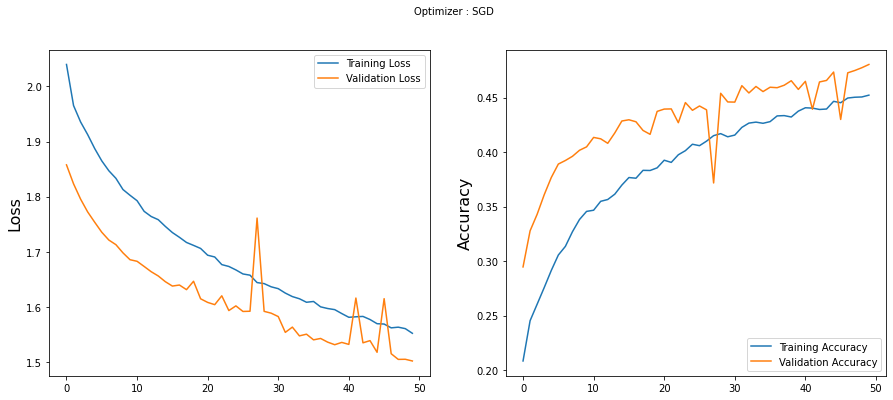

In [17]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : SGD', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**CNN with 4 convolutional layers, 1 hidden layers optimizer=RMSprop activation=Relu**

In [47]:
model=Sequential()
#first convolution layer
model.add(Conv2D(64,(3,3),strides=(1,1),padding="same",input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.20))
model.add(MaxPooling2D(pool_size=(2, 2)))


#second convolution layer
model.add(Conv2D(64,(3,3),strides=(1,1),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.20))
model.add(MaxPooling2D(pool_size=(2, 2)))



#third convolution layer
model.add(Conv2D(128,(3,3),strides=(1,1),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.20))
model.add(MaxPooling2D(pool_size=(2, 2)))


#fourth convolution layer
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.20))
model.add(MaxPooling2D(pool_size=(2, 2)))

#fifth convolution layer
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same",kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.20))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

#1st fully connected layer
model.add(Dense(256,kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#2nd fully connected layer
model.add(Dense(128,kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.20))

#last layer
model.add(Dense(7))
model.add(Activation('softmax'))

#compiling model
opti=Adagrad(learning_rate=0.01)
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])


In [48]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_34 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_109 (Activation)  (None, 48, 48, 64)       0         
                                                                 
 dropout_57 (Dropout)        (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 24, 24, 64)      

**Training the model**

In [50]:
%%time
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

batch_size=150
history = model.fit(train_gen,
                                steps_per_epoch=train_gen.n//train_gen.batch_size,
                                epochs=50,
                                validation_data = validation_gen,
                                validation_steps = validation_gen.n//validation_gen.batch_size,
                                callbacks=callbacks_list)

Epoch 1/50
899/900 [============================>.] - ETA: 0s - loss: 5.8456 - accuracy: 0.4077

900/900 [==============================] - 20s 22ms/step - loss: 5.8444 - accuracy: 0.4077 - val_loss: 5.2790 - val_accuracy: 0.1639
Epoch 2/50
899/900 [============================>.] - ETA: 0s - loss: 3.9127 - accuracy: 0.4545

900/900 [==============================] - 18s 20ms/step - loss: 3.9122 - accuracy: 0.4544 - val_loss: 3.7847 - val_accuracy: 0.2510
Epoch 3/50
899/900 [============================>.] - ETA: 0s - loss: 2.9065 - accuracy: 0.4855

900/900 [==============================] - 18s 20ms/step - loss: 2.9064 - accuracy: 0.4855 - val_loss: 2.8517 - val_accuracy: 0.4001
Epoch 4/50
899/900 [============================>.] - ETA: 0s - loss: 2.4498 - accuracy: 0.5057

900/900 [==============================] - 21s 24ms/step - loss: 2.4499 - accuracy: 0.5056 - val_loss: 2.5426 - val_accuracy: 0.3555
Epoch 5/50
899/900 [============================>.] - ETA: 0s - loss: 2.1744 - accuracy: 0.5204

900/900 [==============================] - 18s 20ms/step - loss: 2.1743 - accuracy: 0.5205 - val_loss: 2.3432 - val_accuracy: 0.4217
Epoch 6/50
899/900 [============================>.] - ETA: 0s - loss: 2.0323 - accuracy: 0.5265

900/900 [==============================] - 19s 21ms/step - loss: 2.0326 - accuracy: 0.5264 - val_loss: 2.4157 - val_accuracy: 0.4020
Epoch 7/50
897/900 [============================>.] - ETA: 0s - loss: 1.9099 - accuracy: 0.5418

900/900 [==============================] - 19s 21ms/step - loss: 1.9100 - accuracy: 0.5417 - val_loss: 2.0637 - val_accuracy: 0.4409
Epoch 8/50
900/900 [==============================] - ETA: 0s - loss: 1.8407 - accuracy: 0.5474

900/900 [==============================] - 19s 21ms/step - loss: 1.8407 - accuracy: 0.5474 - val_loss: 1.8957 - val_accuracy: 0.5203
Epoch 9/50
898/900 [============================>.] - ETA: 0s - loss: 1.7699 - accuracy: 0.5538

900/900 [==============================] - 18s 20ms/step - loss: 1.7693 - accuracy: 0.5541 - val_loss: 2.0951 - val_accuracy: 0.3977
Epoch 10/50
900/900 [==============================] - ETA: 0s - loss: 1.7230 - accuracy: 0.5632

900/900 [==============================] - 20s 23ms/step - loss: 1.7230 - accuracy: 0.5632 - val_loss: 2.1676 - val_accuracy: 0.3365
Epoch 11/50
899/900 [============================>.] - ETA: 0s - loss: 1.6591 - accuracy: 0.5739

900/900 [==============================] - 18s 20ms/step - loss: 1.6592 - accuracy: 0.5739 - val_loss: 1.8399 - val_accuracy: 0.4879
Epoch 12/50
898/900 [============================>.] - ETA: 0s - loss: 1.6173 - accuracy: 0.5794

900/900 [==============================] - 18s 20ms/step - loss: 1.6170 - accuracy: 0.5795 - val_loss: 1.9926 - val_accuracy: 0.3911
Epoch 13/50
899/900 [============================>.] - ETA: 0s - loss: 1.5862 - accuracy: 0.5895

900/900 [==============================] - 20s 22ms/step - loss: 1.5863 - accuracy: 0.5895 - val_loss: 1.9852 - val_accuracy: 0.3972
Epoch 14/50
899/900 [============================>.] - ETA: 0s - loss: 1.5520 - accuracy: 0.5943

900/900 [==============================] - 18s 20ms/step - loss: 1.5520 - accuracy: 0.5943 - val_loss: 1.9138 - val_accuracy: 0.4378
Epoch 15/50
897/900 [============================>.] - ETA: 0s - loss: 1.5251 - accuracy: 0.5971

900/900 [==============================] - 20s 22ms/step - loss: 1.5251 - accuracy: 0.5970 - val_loss: 2.0557 - val_accuracy: 0.3597
Epoch 16/50
897/900 [============================>.] - ETA: 0s - loss: 1.5041 - accuracy: 0.6079

900/900 [==============================] - 19s 21ms/step - loss: 1.5036 - accuracy: 0.6080 - val_loss: 1.9064 - val_accuracy: 0.4440
Epoch 17/50
899/900 [============================>.] - ETA: 0s - loss: 1.4670 - accuracy: 0.6104

900/900 [==============================] - 19s 21ms/step - loss: 1.4669 - accuracy: 0.6105 - val_loss: 1.7100 - val_accuracy: 0.4906
Epoch 18/50
900/900 [==============================] - ETA: 0s - loss: 1.4460 - accuracy: 0.6180

900/900 [==============================] - 21s 24ms/step - loss: 1.4460 - accuracy: 0.6180 - val_loss: 1.5901 - val_accuracy: 0.5443
Epoch 19/50
897/900 [============================>.] - ETA: 0s - loss: 1.4176 - accuracy: 0.6235

900/900 [==============================] - 18s 20ms/step - loss: 1.4176 - accuracy: 0.6236 - val_loss: 1.7571 - val_accuracy: 0.4801
Epoch 20/50
899/900 [============================>.] - ETA: 0s - loss: 1.4040 - accuracy: 0.6259

900/900 [==============================] - 19s 21ms/step - loss: 1.4039 - accuracy: 0.6259 - val_loss: 1.7531 - val_accuracy: 0.5091
Epoch 21/50
899/900 [============================>.] - ETA: 0s - loss: 1.4026 - accuracy: 0.6299

900/900 [==============================] - 18s 20ms/step - loss: 1.4025 - accuracy: 0.6298 - val_loss: 1.8184 - val_accuracy: 0.4683
Epoch 22/50
898/900 [============================>.] - ETA: 0s - loss: 1.3738 - accuracy: 0.6397

900/900 [==============================] - 19s 21ms/step - loss: 1.3735 - accuracy: 0.6397 - val_loss: 1.6197 - val_accuracy: 0.5352
Epoch 23/50
899/900 [============================>.] - ETA: 0s - loss: 1.3583 - accuracy: 0.6438

900/900 [==============================] - 18s 20ms/step - loss: 1.3584 - accuracy: 0.6438 - val_loss: 1.9243 - val_accuracy: 0.4489
Epoch 24/50
900/900 [==============================] - ETA: 0s - loss: 1.3457 - accuracy: 0.6440

900/900 [==============================] - 19s 21ms/step - loss: 1.3457 - accuracy: 0.6440 - val_loss: 1.9318 - val_accuracy: 0.4344
Epoch 25/50
899/900 [============================>.] - ETA: 0s - loss: 1.3318 - accuracy: 0.6484

900/900 [==============================] - 18s 20ms/step - loss: 1.3318 - accuracy: 0.6483 - val_loss: 1.7057 - val_accuracy: 0.4699
Epoch 26/50
900/900 [==============================] - ETA: 0s - loss: 1.3144 - accuracy: 0.6571

900/900 [==============================] - 24s 27ms/step - loss: 1.3144 - accuracy: 0.6571 - val_loss: 1.6448 - val_accuracy: 0.5426
Epoch 27/50
898/900 [============================>.] - ETA: 0s - loss: 1.2999 - accuracy: 0.6627

900/900 [==============================] - 20s 23ms/step - loss: 1.2997 - accuracy: 0.6627 - val_loss: 1.7956 - val_accuracy: 0.4892
Epoch 28/50
899/900 [============================>.] - ETA: 0s - loss: 1.2753 - accuracy: 0.6698

900/900 [==============================] - 19s 21ms/step - loss: 1.2753 - accuracy: 0.6698 - val_loss: 1.6924 - val_accuracy: 0.5152
Epoch 29/50
900/900 [==============================] - ETA: 0s - loss: 1.2583 - accuracy: 0.6723

900/900 [==============================] - 18s 20ms/step - loss: 1.2583 - accuracy: 0.6723 - val_loss: 1.6851 - val_accuracy: 0.5217
Epoch 30/50
899/900 [============================>.] - ETA: 0s - loss: 1.2556 - accuracy: 0.6733

900/900 [==============================] - 19s 21ms/step - loss: 1.2559 - accuracy: 0.6731 - val_loss: 1.5990 - val_accuracy: 0.5455
Epoch 31/50
900/900 [==============================] - ETA: 0s - loss: 1.2319 - accuracy: 0.6804

900/900 [==============================] - 18s 20ms/step - loss: 1.2319 - accuracy: 0.6804 - val_loss: 2.0317 - val_accuracy: 0.4264
Epoch 32/50
898/900 [============================>.] - ETA: 0s - loss: 1.2116 - accuracy: 0.6842

900/900 [==============================] - 19s 21ms/step - loss: 1.2114 - accuracy: 0.6842 - val_loss: 1.7255 - val_accuracy: 0.4828
Epoch 33/50
897/900 [============================>.] - ETA: 0s - loss: 1.2177 - accuracy: 0.6847

900/900 [==============================] - 18s 20ms/step - loss: 1.2175 - accuracy: 0.6847 - val_loss: 1.7002 - val_accuracy: 0.5169
Epoch 34/50
898/900 [============================>.] - ETA: 0s - loss: 1.1845 - accuracy: 0.6947

900/900 [==============================] - 18s 20ms/step - loss: 1.1842 - accuracy: 0.6949 - val_loss: 1.8149 - val_accuracy: 0.4697
Epoch 35/50
899/900 [============================>.] - ETA: 0s - loss: 1.1883 - accuracy: 0.6986

900/900 [==============================] - 19s 22ms/step - loss: 1.1884 - accuracy: 0.6986 - val_loss: 1.6602 - val_accuracy: 0.5146
Epoch 36/50
899/900 [============================>.] - ETA: 0s - loss: 1.1863 - accuracy: 0.7053

900/900 [==============================] - 18s 20ms/step - loss: 1.1861 - accuracy: 0.7054 - val_loss: 1.9183 - val_accuracy: 0.4680
Epoch 37/50
899/900 [============================>.] - ETA: 0s - loss: 1.1703 - accuracy: 0.7076

900/900 [==============================] - 18s 20ms/step - loss: 1.1702 - accuracy: 0.7076 - val_loss: 1.6192 - val_accuracy: 0.5526
Epoch 38/50
898/900 [============================>.] - ETA: 0s - loss: 1.1610 - accuracy: 0.7126

900/900 [==============================] - 19s 21ms/step - loss: 1.1607 - accuracy: 0.7127 - val_loss: 1.9677 - val_accuracy: 0.4618
Epoch 39/50
898/900 [============================>.] - ETA: 0s - loss: 1.1422 - accuracy: 0.7154

900/900 [==============================] - 18s 20ms/step - loss: 1.1427 - accuracy: 0.7153 - val_loss: 1.5193 - val_accuracy: 0.5722
Epoch 40/50
898/900 [============================>.] - ETA: 0s - loss: 1.1431 - accuracy: 0.7138

900/900 [==============================] - 21s 23ms/step - loss: 1.1427 - accuracy: 0.7140 - val_loss: 1.6829 - val_accuracy: 0.5312
Epoch 41/50
898/900 [============================>.] - ETA: 0s - loss: 1.1279 - accuracy: 0.7188

900/900 [==============================] - 19s 21ms/step - loss: 1.1280 - accuracy: 0.7188 - val_loss: 1.6746 - val_accuracy: 0.4952
Epoch 42/50
897/900 [============================>.] - ETA: 0s - loss: 1.1150 - accuracy: 0.7225

900/900 [==============================] - 18s 20ms/step - loss: 1.1151 - accuracy: 0.7225 - val_loss: 1.5412 - val_accuracy: 0.5811
Epoch 43/50
899/900 [============================>.] - ETA: 0s - loss: 1.1138 - accuracy: 0.7263

900/900 [==============================] - 19s 21ms/step - loss: 1.1138 - accuracy: 0.7263 - val_loss: 1.5360 - val_accuracy: 0.5837
Epoch 44/50
899/900 [============================>.] - ETA: 0s - loss: 1.0910 - accuracy: 0.7356

900/900 [==============================] - 21s 23ms/step - loss: 1.0915 - accuracy: 0.7354 - val_loss: 1.6222 - val_accuracy: 0.5205
Epoch 45/50
900/900 [==============================] - ETA: 0s - loss: 1.0772 - accuracy: 0.7378

900/900 [==============================] - 18s 20ms/step - loss: 1.0772 - accuracy: 0.7378 - val_loss: 1.9049 - val_accuracy: 0.4483
Epoch 46/50
898/900 [============================>.] - ETA: 0s - loss: 1.0666 - accuracy: 0.7389

900/900 [==============================] - 19s 21ms/step - loss: 1.0667 - accuracy: 0.7387 - val_loss: 1.9702 - val_accuracy: 0.4517
Epoch 47/50
897/900 [============================>.] - ETA: 0s - loss: 1.0682 - accuracy: 0.7435

900/900 [==============================] - 18s 20ms/step - loss: 1.0684 - accuracy: 0.7433 - val_loss: 1.8904 - val_accuracy: 0.4874
Epoch 48/50
900/900 [==============================] - ETA: 0s - loss: 1.0687 - accuracy: 0.7437

900/900 [==============================] - 19s 21ms/step - loss: 1.0687 - accuracy: 0.7437 - val_loss: 1.4245 - val_accuracy: 0.6129
Epoch 49/50
898/900 [============================>.] - ETA: 0s - loss: 1.0369 - accuracy: 0.7504

900/900 [==============================] - 21s 24ms/step - loss: 1.0368 - accuracy: 0.7503 - val_loss: 1.6529 - val_accuracy: 0.5374
Epoch 50/50
898/900 [============================>.] - ETA: 0s - loss: 1.0304 - accuracy: 0.7503

900/900 [==============================] - 19s 21ms/step - loss: 1.0301 - accuracy: 0.7504 - val_loss: 1.5720 - val_accuracy: 0.5557
CPU times: user 20min 21s, sys: 1min 25s, total: 21min 47s
Wall time: 18min 3s


In [51]:
model_json_Adagrad = model.to_json()
with open("model.json_Adagrad", "w") as json_file :
	json_file.write(model_json_Adagrad)
model.save_weights("model.h5_Adagrad")
print("Saved model to disk")

model.save('CNN.model_Adagrad')

Saved model to disk


**Performance**

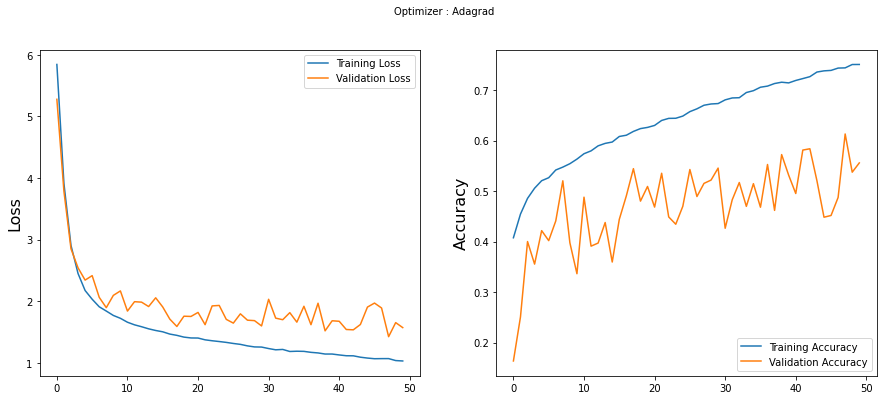

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adagrad', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**CNN with 6 conolution layers, 2 hidden layers, optimizer=Adam, Activation=Relu**

In [80]:
model=Sequential()
#first convolution layer
model.add(Conv2D(64,(7,7),strides=(1,1),padding="same",input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


#second convolution layer
model.add(Conv2D(128,(5,5),strides=(1,1),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))



#third convolution layer
model.add(Conv2D(256,(5,5),strides=(1,1),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

#fourth convolution layer
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


#fifth convolution layer
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

#sixth convolution layer
model.add(Conv2D(512,(3,3),strides=(2,2),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))


model.add(Flatten())

#1st fully connected layer
model.add(Dense(256,kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.30))

#2nd fully connected layer
model.add(Dense(128,kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.30))

#last layer
model.add(Dense(7))
model.add(Activation('softmax'))

#compiling model
opti=Adam(learning_rate=0.001)
model.compile(optimizer=opti,loss='categorical_crossentropy',metrics=['accuracy'])


In [81]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_139 (Conv2D)         (None, 48, 48, 64)        3200      
                                                                 
 batch_normalization_127 (Ba  (None, 48, 48, 64)       256       
 tchNormalization)                                               
                                                                 
 activation_213 (Activation)  (None, 48, 48, 64)       0         
                                                                 
 max_pooling2d_135 (MaxPooli  (None, 24, 24, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_140 (Conv2D)         (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_128 (Ba  (None, 24, 24, 128)    

**training model**

In [82]:
%%time
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


history = model.fit(train_gen,batch_size=150,
                            
                                epochs=50,
                                validation_data = validation_gen,
                                
                                callbacks=callbacks_list)

Epoch 1/50
901/901 [==============================] - ETA: 0s - loss: 2.0972 - accuracy: 0.3398

901/901 [==============================] - 23s 24ms/step - loss: 2.0972 - accuracy: 0.3398 - val_loss: 1.9401 - val_accuracy: 0.3654
Epoch 2/50
900/901 [============================>.] - ETA: 0s - loss: 1.5510 - accuracy: 0.4655

901/901 [==============================] - 20s 23ms/step - loss: 1.5512 - accuracy: 0.4656 - val_loss: 1.4901 - val_accuracy: 0.4674
Epoch 3/50
901/901 [==============================] - ETA: 0s - loss: 1.3465 - accuracy: 0.5146

901/901 [==============================] - 21s 23ms/step - loss: 1.3465 - accuracy: 0.5146 - val_loss: 1.6768 - val_accuracy: 0.3397
Epoch 4/50
901/901 [==============================] - ETA: 0s - loss: 1.2407 - accuracy: 0.5564

901/901 [==============================] - 22s 25ms/step - loss: 1.2407 - accuracy: 0.5564 - val_loss: 1.2853 - val_accuracy: 0.5299
Epoch 5/50
899/901 [============================>.] - ETA: 0s - loss: 1.1464 - accuracy: 0.5922

901/901 [==============================] - 22s 25ms/step - loss: 1.1461 - accuracy: 0.5923 - val_loss: 1.3895 - val_accuracy: 0.5342
Epoch 6/50
899/901 [============================>.] - ETA: 0s - loss: 1.0538 - accuracy: 0.6333

901/901 [==============================] - 21s 23ms/step - loss: 1.0542 - accuracy: 0.6332 - val_loss: 1.4975 - val_accuracy: 0.4632
Epoch 7/50
900/901 [============================>.] - ETA: 0s - loss: 0.9462 - accuracy: 0.6749

901/901 [==============================] - 23s 26ms/step - loss: 0.9463 - accuracy: 0.6748 - val_loss: 1.4772 - val_accuracy: 0.4922
Epoch 8/50
901/901 [==============================] - ETA: 0s - loss: 0.8255 - accuracy: 0.7235

901/901 [==============================] - 20s 23ms/step - loss: 0.8255 - accuracy: 0.7235 - val_loss: 1.3354 - val_accuracy: 0.5518
Epoch 9/50
901/901 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.7747

901/901 [==============================] - 21s 23ms/step - loss: 0.6921 - accuracy: 0.7747 - val_loss: 1.7570 - val_accuracy: 0.4699
Epoch 10/50
900/901 [============================>.] - ETA: 0s - loss: 0.5724 - accuracy: 0.8219

901/901 [==============================] - 23s 26ms/step - loss: 0.5724 - accuracy: 0.8218 - val_loss: 1.3895 - val_accuracy: 0.5834
Epoch 11/50
899/901 [============================>.] - ETA: 0s - loss: 0.4743 - accuracy: 0.8571

901/901 [==============================] - 21s 23ms/step - loss: 0.4741 - accuracy: 0.8572 - val_loss: 1.6161 - val_accuracy: 0.5242
Epoch 12/50
901/901 [==============================] - ETA: 0s - loss: 0.3896 - accuracy: 0.8898

901/901 [==============================] - 21s 23ms/step - loss: 0.3896 - accuracy: 0.8898 - val_loss: 1.7343 - val_accuracy: 0.5471
Epoch 13/50
901/901 [==============================] - ETA: 0s - loss: 0.3249 - accuracy: 0.9104

901/901 [==============================] - 21s 23ms/step - loss: 0.3249 - accuracy: 0.9104 - val_loss: 2.1125 - val_accuracy: 0.5249
Epoch 14/50
899/901 [============================>.] - ETA: 0s - loss: 0.2964 - accuracy: 0.9201

901/901 [==============================] - 23s 26ms/step - loss: 0.2962 - accuracy: 0.9201 - val_loss: 2.0275 - val_accuracy: 0.5551
Epoch 15/50
900/901 [============================>.] - ETA: 0s - loss: 0.2602 - accuracy: 0.9310

901/901 [==============================] - 21s 23ms/step - loss: 0.2604 - accuracy: 0.9310 - val_loss: 2.1077 - val_accuracy: 0.5067
Epoch 16/50
901/901 [==============================] - ETA: 0s - loss: 0.2379 - accuracy: 0.9390

901/901 [==============================] - 21s 24ms/step - loss: 0.2379 - accuracy: 0.9390 - val_loss: 2.3967 - val_accuracy: 0.5054
Epoch 17/50
900/901 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9458

901/901 [==============================] - 22s 24ms/step - loss: 0.2203 - accuracy: 0.9459 - val_loss: 2.3812 - val_accuracy: 0.5434
Epoch 18/50
899/901 [============================>.] - ETA: 0s - loss: 0.2012 - accuracy: 0.9521

901/901 [==============================] - 23s 26ms/step - loss: 0.2010 - accuracy: 0.9522 - val_loss: 2.1391 - val_accuracy: 0.5234
Epoch 19/50
901/901 [==============================] - ETA: 0s - loss: 0.2029 - accuracy: 0.9515

901/901 [==============================] - 21s 23ms/step - loss: 0.2029 - accuracy: 0.9515 - val_loss: 2.1665 - val_accuracy: 0.5604
Epoch 20/50
899/901 [============================>.] - ETA: 0s - loss: 0.1887 - accuracy: 0.9553

901/901 [==============================] - 21s 23ms/step - loss: 0.1887 - accuracy: 0.9553 - val_loss: 1.9516 - val_accuracy: 0.5719
Epoch 21/50
899/901 [============================>.] - ETA: 0s - loss: 0.1756 - accuracy: 0.9594

901/901 [==============================] - 21s 24ms/step - loss: 0.1756 - accuracy: 0.9594 - val_loss: 2.3026 - val_accuracy: 0.5633
Epoch 22/50
899/901 [============================>.] - ETA: 0s - loss: 0.1632 - accuracy: 0.9624

901/901 [==============================] - 21s 23ms/step - loss: 0.1633 - accuracy: 0.9624 - val_loss: 1.9940 - val_accuracy: 0.5623
Epoch 23/50
901/901 [==============================] - ETA: 0s - loss: 0.1640 - accuracy: 0.9606

901/901 [==============================] - 21s 24ms/step - loss: 0.1640 - accuracy: 0.9606 - val_loss: 2.2988 - val_accuracy: 0.5481
Epoch 24/50
901/901 [==============================] - ETA: 0s - loss: 0.1538 - accuracy: 0.9663

901/901 [==============================] - 22s 24ms/step - loss: 0.1538 - accuracy: 0.9663 - val_loss: 1.8876 - val_accuracy: 0.5863
Epoch 25/50
901/901 [==============================] - ETA: 0s - loss: 0.1494 - accuracy: 0.9668

901/901 [==============================] - 25s 28ms/step - loss: 0.1494 - accuracy: 0.9668 - val_loss: 2.3837 - val_accuracy: 0.5398
Epoch 26/50
900/901 [============================>.] - ETA: 0s - loss: 0.1447 - accuracy: 0.9675

901/901 [==============================] - 21s 23ms/step - loss: 0.1448 - accuracy: 0.9675 - val_loss: 2.1485 - val_accuracy: 0.5698
Epoch 27/50
899/901 [============================>.] - ETA: 0s - loss: 0.1318 - accuracy: 0.9699

901/901 [==============================] - 22s 25ms/step - loss: 0.1316 - accuracy: 0.9699 - val_loss: 2.3118 - val_accuracy: 0.5695
Epoch 28/50
900/901 [============================>.] - ETA: 0s - loss: 0.1275 - accuracy: 0.9721

901/901 [==============================] - 21s 24ms/step - loss: 0.1274 - accuracy: 0.9721 - val_loss: 2.2698 - val_accuracy: 0.5723
Epoch 29/50
900/901 [============================>.] - ETA: 0s - loss: 0.1387 - accuracy: 0.9689

901/901 [==============================] - 23s 26ms/step - loss: 0.1388 - accuracy: 0.9689 - val_loss: 1.9951 - val_accuracy: 0.5849
Epoch 30/50
901/901 [==============================] - ETA: 0s - loss: 0.1209 - accuracy: 0.9739

901/901 [==============================] - 21s 24ms/step - loss: 0.1209 - accuracy: 0.9739 - val_loss: 2.1728 - val_accuracy: 0.5928
Epoch 31/50
900/901 [============================>.] - ETA: 0s - loss: 0.1177 - accuracy: 0.9739

901/901 [==============================] - 21s 24ms/step - loss: 0.1177 - accuracy: 0.9739 - val_loss: 2.2570 - val_accuracy: 0.5934
Epoch 32/50
901/901 [==============================] - ETA: 0s - loss: 0.1212 - accuracy: 0.9730

901/901 [==============================] - 22s 24ms/step - loss: 0.1212 - accuracy: 0.9730 - val_loss: 2.2663 - val_accuracy: 0.5909
Epoch 33/50
899/901 [============================>.] - ETA: 0s - loss: 0.1161 - accuracy: 0.9736

901/901 [==============================] - 22s 24ms/step - loss: 0.1163 - accuracy: 0.9737 - val_loss: 2.2152 - val_accuracy: 0.5815
Epoch 34/50
899/901 [============================>.] - ETA: 0s - loss: 0.1080 - accuracy: 0.9761

901/901 [==============================] - 21s 23ms/step - loss: 0.1086 - accuracy: 0.9760 - val_loss: 2.0132 - val_accuracy: 0.5808
Epoch 35/50
901/901 [==============================] - ETA: 0s - loss: 0.1105 - accuracy: 0.9757

901/901 [==============================] - 22s 24ms/step - loss: 0.1105 - accuracy: 0.9757 - val_loss: 2.2943 - val_accuracy: 0.5712
Epoch 36/50
900/901 [============================>.] - ETA: 0s - loss: 0.1081 - accuracy: 0.9773

901/901 [==============================] - 22s 24ms/step - loss: 0.1081 - accuracy: 0.9773 - val_loss: 2.3900 - val_accuracy: 0.5753
Epoch 37/50
900/901 [============================>.] - ETA: 0s - loss: 0.1025 - accuracy: 0.9778

901/901 [==============================] - 20s 23ms/step - loss: 0.1026 - accuracy: 0.9778 - val_loss: 2.2338 - val_accuracy: 0.5950
Epoch 38/50
899/901 [============================>.] - ETA: 0s - loss: 0.1017 - accuracy: 0.9780

901/901 [==============================] - 22s 24ms/step - loss: 0.1017 - accuracy: 0.9779 - val_loss: 2.5830 - val_accuracy: 0.5747
Epoch 39/50
901/901 [==============================] - ETA: 0s - loss: 0.1023 - accuracy: 0.9790

901/901 [==============================] - 22s 25ms/step - loss: 0.1023 - accuracy: 0.9790 - val_loss: 2.3706 - val_accuracy: 0.5957
Epoch 40/50
900/901 [============================>.] - ETA: 0s - loss: 0.0943 - accuracy: 0.9791

901/901 [==============================] - 21s 24ms/step - loss: 0.0947 - accuracy: 0.9789 - val_loss: 2.7156 - val_accuracy: 0.5484
Epoch 41/50
901/901 [==============================] - ETA: 0s - loss: 0.1009 - accuracy: 0.9773

901/901 [==============================] - 21s 23ms/step - loss: 0.1009 - accuracy: 0.9773 - val_loss: 2.2507 - val_accuracy: 0.5858
Epoch 42/50
899/901 [============================>.] - ETA: 0s - loss: 0.0927 - accuracy: 0.9807

901/901 [==============================] - 22s 24ms/step - loss: 0.0927 - accuracy: 0.9807 - val_loss: 2.1768 - val_accuracy: 0.5883
Epoch 43/50
901/901 [==============================] - ETA: 0s - loss: 0.0937 - accuracy: 0.9802

901/901 [==============================] - 22s 24ms/step - loss: 0.0937 - accuracy: 0.9802 - val_loss: 2.2841 - val_accuracy: 0.5781
Epoch 44/50
899/901 [============================>.] - ETA: 0s - loss: 0.0893 - accuracy: 0.9809

901/901 [==============================] - 24s 26ms/step - loss: 0.0893 - accuracy: 0.9809 - val_loss: 2.4121 - val_accuracy: 0.5783
Epoch 45/50
900/901 [============================>.] - ETA: 0s - loss: 0.0872 - accuracy: 0.9823

901/901 [==============================] - 21s 23ms/step - loss: 0.0872 - accuracy: 0.9822 - val_loss: 2.5785 - val_accuracy: 0.5846
Epoch 46/50
901/901 [==============================] - ETA: 0s - loss: 0.0882 - accuracy: 0.9821

901/901 [==============================] - 21s 24ms/step - loss: 0.0882 - accuracy: 0.9821 - val_loss: 2.3794 - val_accuracy: 0.5760
Epoch 47/50
899/901 [============================>.] - ETA: 0s - loss: 0.0844 - accuracy: 0.9817

901/901 [==============================] - 21s 24ms/step - loss: 0.0843 - accuracy: 0.9817 - val_loss: 2.1789 - val_accuracy: 0.5996
Epoch 48/50
899/901 [============================>.] - ETA: 0s - loss: 0.0843 - accuracy: 0.9826

901/901 [==============================] - 21s 23ms/step - loss: 0.0842 - accuracy: 0.9826 - val_loss: 2.2363 - val_accuracy: 0.5962
Epoch 49/50
901/901 [==============================] - ETA: 0s - loss: 0.0842 - accuracy: 0.9816

901/901 [==============================] - 22s 24ms/step - loss: 0.0842 - accuracy: 0.9816 - val_loss: 2.3027 - val_accuracy: 0.5744
Epoch 50/50
901/901 [==============================] - ETA: 0s - loss: 0.0795 - accuracy: 0.9837

901/901 [==============================] - 22s 24ms/step - loss: 0.0795 - accuracy: 0.9837 - val_loss: 2.5103 - val_accuracy: 0.5875
CPU times: user 22min 51s, sys: 1min 24s, total: 24min 16s
Wall time: 19min 40s


**Performance**

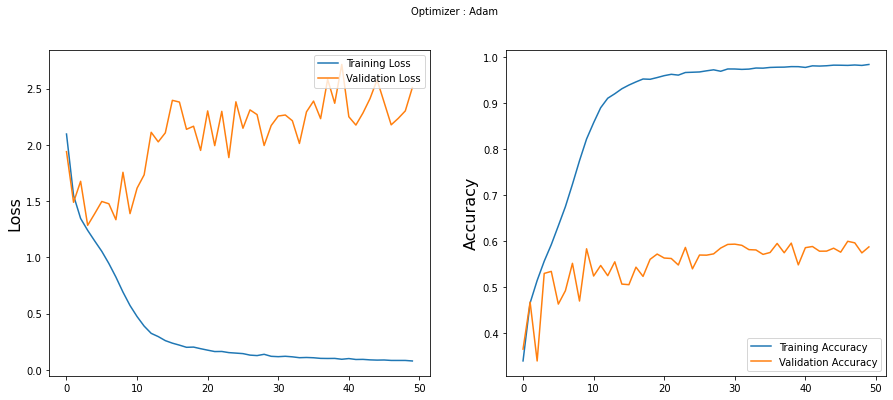

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [84]:
model_json_adam = model.to_json()
with open("model.json_adam", "w") as json_file :
	json_file.write(model_json_adam)
model.save_weights("model.h5_adam")
print("Saved model to disk")

model.save('CNN.model_adam')

Saved model to disk


1/1 [==============================] - 0s 127ms/step
disgust


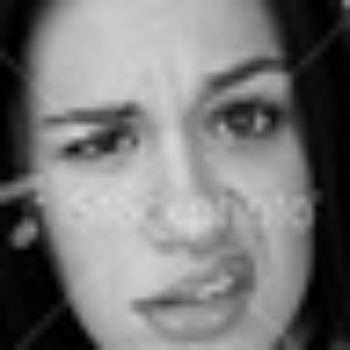

In [111]:
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keras.preprocessing import image
CATEGORIES = ["sad", "surprise", "angry", "happy", "disgust","fear", "neutral"]
def prepare(file):
    IMG_SIZE = 48
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (48, 48))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
model = tf.keras.models.load_model("CNN.model_SGD")

image_name = "1115.jpg" #your image path
prediction = model.predict(prepare(f"/content/images/validation/disgust/{image_name}"))
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])
img_path=(f"/content/images/validation/disgust/{image_name}")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
imS = cv2.resize(img, (350,350))
cv2_imshow(imS)





1/1 [==============================] - 0s 217ms/step
happy


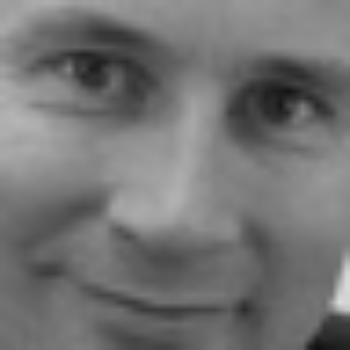

In [113]:
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keras.preprocessing import image
CATEGORIES = ["sad", "surprise", "angry", "happy", "disgust","fear", "neutral"]
def prepare(file):
    IMG_SIZE = 48
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (48, 48))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
model = tf.keras.models.load_model("CNN.model_Adagrad")

image_name = "10019.jpg" #your image path
prediction = model.predict(prepare(f"/content/images/validation/happy/{image_name}"))
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])
img_path=(f"/content/images/validation/happy/{image_name}")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
imS = cv2.resize(img, (350,350))
cv2_imshow(imS)

1/1 [==============================] - 0s 198ms/step
sad


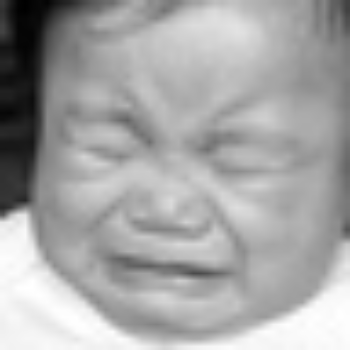

In [126]:
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keras.preprocessing import image
CATEGORIES = ["sad", "surprise", "angry", "happy", "disgust","fear", "neutral"]
def prepare(file):
    IMG_SIZE = 48
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (48, 48))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
model = tf.keras.models.load_model("CNN.model_adam")

image_name = "10176.jpg" #your image path
prediction = model.predict(prepare(f"/content/images/validation/sad/{image_name}"))
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])
img_path=(f"/content/images/validation/sad/{image_name}")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
imS = cv2.resize(img, (350,350))
cv2_imshow(imS)

**Training time comparsion**

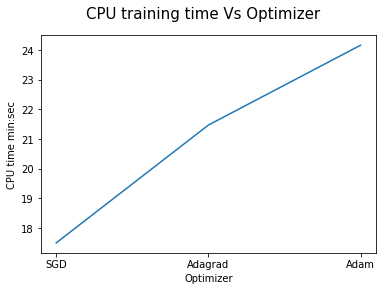

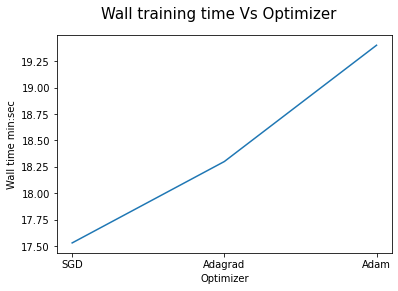

In [127]:
wall_time=[17.53,18.3,19.40]
cpu_time=[17.50,21.47,24.16]
opt=['SGD','Adagrad','Adam']

plt.suptitle('CPU training time Vs Optimizer',fontsize=15)
plt.xlabel('Optimizer', fontsize=10)
plt.ylabel('CPU time min:sec', fontsize=10)
plt.plot(opt,cpu_time)
plt.show()


plt.suptitle('Wall training time Vs Optimizer',fontsize=15)
plt.xlabel('Optimizer', fontsize=10)
plt.ylabel('Wall time min:sec', fontsize=10)
plt.plot(opt,wall_time)
plt.show()

